In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_seq_items = 20000

In [7]:
# Dataset location
database = '/Users/krishnaprasad/Study/NYU/Capstone/Notebooks/Strikes_Master.csv'

# Read in a CSV file and store the contents in a dataframe (df)
df = pd.read_csv(database, low_memory=False,encoding = "ISO-8859-1")
df

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,100000,AAL,AMERICAN AIRLINES,B-727,148,10,34.0,10,A,4.0,...,Deleted,Deleted,5/14/92,FAA Form 5200-7,Pilot,NaN,NaN,3/14/96,False,False
1,100001,UAL,UNITED AIRLINES,B-737-300,148,24,10.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/07,False,False
2,100002,UAL,UNITED AIRLINES,B-737-300,148,24,10.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/07,False,False
3,100003,UAL,UNITED AIRLINES,B-757-200,148,26,34.0,40,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/07,False,False
4,100004,UAL,UNITED AIRLINES,A-320,04A,03,23.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/07,False,False
5,100005,UAL,UNITED AIRLINES,A-320,04A,03,23.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/07,False,True
6,100006,AAL,AMERICAN AIRLINES,B-727-100,148,10,34.0,10,A,4.0,...,Deleted,Deleted,6/5/91,Other,Pilot,NaN,NaN,11/21/97,False,False
7,100007,AMW,AIR MIDWEST,BE-1900,123,27,31.0,04,A,3.0,...,NaN,NaN,NaN,FAA Form 5200-7,NaN,NaN,NaN,5/13/98,False,True
8,100008,UAL,UNITED AIRLINES,B-737-500,148,33,10.0,01,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,12/20/07,False,False
9,100009,AAL,AMERICAN AIRLINES,MD-80,583,37,34.0,10,A,4.0,...,Deleted,Deleted,NaN,FAA Form 5200-7,Pilot,NaN,NaN,1/21/99,False,False


#### Features like identifiers or registration numbers are pruned from the dataset as they do not influence the target variable

In [8]:
strikes=df.drop(columns=['OPID','AMA','AMO','EMA','EMO','ENG_1_POS','ENG_2_POS','ENG_3_POS','ENG_4_POS','REG','FLT','FAAREGION','REPORTED_NAME','REPORTED_TITLE','REPORTED_DATE','LUPDATE','SOURCE','PERSON'])

In [9]:
strikes
list(strikes.columns)

,INDEX_NR,OPERATOR,ATYPE,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,...,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,TRANSFER,INDICATED_DAMAGE
0,100000,AMERICAN AIRLINES,B-727,A,4.0,3.0,D,False,False,5/13/92,...,ASKED MAINT TO INSPCT VICINITY OF #2 ENG WHERE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,100001,UNITED AIRLINES,B-737-300,A,4.0,2.0,D,False,False,6/22/96,...,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,100002,UNITED AIRLINES,B-737-300,A,4.0,2.0,D,False,False,6/26/96,...,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,100003,UNITED AIRLINES,B-757-200,A,4.0,2.0,D,False,False,7/1/96,...,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,100004,UNITED AIRLINES,A-320,A,4.0,2.0,D,False,False,7/1/96,...,"ON FINAL APCH, STRIKE UNDER THE NOSE OF THE CO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
5,100005,UNITED AIRLINES,A-320,A,4.0,2.0,D,False,False,7/1/96,...,LOUD NOISE WAS HEARD DURING CLIMBOUT THAT SOUN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
6,100006,AMERICAN AIRLINES,B-727-100,A,4.0,3.0,D,False,False,5/6/91,...,NO DAMAGE/INJURY. TIME = 1125 GMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
7,100007,AIR MIDWEST,BE-1900,A,3.0,2.0,C,False,False,11/5/93,...,ATIS WARNING. STRUCK NUMEROUS OTHER PARTS OF A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
8,100008,UNITED AIRLINES,B-737-500,A,4.0,2.0,D,False,False,7/2/95,...,STRIKE ON NOSE IMMEDIATELY AFTER LANDING. STRU...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
9,100009,AMERICAN AIRLINES,MD-80,A,4.0,2.0,D,False,False,9/19/90,...,HIT 2. SPARROW OR OTHER SMALL SIZE BIRD. NO DA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


['INDEX_NR',
 'OPERATOR',
 'ATYPE',
 'AC_CLASS',
 'AC_MASS',
 'NUM_ENGS',
 'TYPE_ENG',
 'REMAINS_COLLECTED',
 'REMAINS_SENT',
 'INCIDENT_DATE',
 'INCIDENT_MONTH',
 'INCIDENT_YEAR',
 'TIME_OF_DAY',
 'TIME',
 'AIRPORT_ID',
 'AIRPORT',
 'STATE',
 'ENROUTE',
 'RUNWAY',
 'LOCATION',
 'HEIGHT',
 'SPEED',
 'DISTANCE',
 'PHASE_OF_FLT',
 'DAMAGE',
 'STR_RAD',
 'DAM_RAD',
 'STR_WINDSHLD',
 'DAM_WINDSHLD',
 'STR_NOSE',
 'DAM_NOSE',
 'STR_ENG1',
 'DAM_ENG1',
 'STR_ENG2',
 'DAM_ENG2',
 'STR_ENG3',
 'DAM_ENG3',
 'STR_ENG4',
 'DAM_ENG4',
 'INGESTED',
 'STR_PROP',
 'DAM_PROP',
 'STR_WING_ROT',
 'DAM_WING_ROT',
 'STR_FUSE',
 'DAM_FUSE',
 'STR_LG',
 'DAM_LG',
 'STR_TAIL',
 'DAM_TAIL',
 'STR_LGHTS',
 'DAM_LGHTS',
 'STR_OTHER',
 'DAM_OTHER',
 'OTHER_SPECIFY',
 'EFFECT',
 'EFFECT_OTHER',
 'SKY',
 'PRECIP',
 'SPECIES_ID',
 'SPECIES',
 'BIRDS_SEEN',
 'BIRDS_STRUCK',
 'SIZE',
 'WARNED',
 'COMMENTS',
 'REMARKS',
 'AOS',
 'COST_REPAIRS',
 'COST_OTHER',
 'COST_REPAIRS_INFL_ADJ',
 'COST_OTHER_INFL_ADJ',
 'NR_INJU

In [10]:
# Get all unique values from all columns
def getAllUniqueValues():
    unique_values = {}
    for col in list(strikes):
        unique_values.update({col:np.sort(strikes[col].astype(str).unique())})
    return unique_values

In [11]:
# Get Unique values for all columns
unique_dict = getAllUniqueValues()
unique_dict

{'INDEX_NR': array(['1', '10', '100', ..., '97', '98', '99'], dtype=object),
 'OPERATOR': array(['1US AIRWAYS', 'ABELAG AVIATION', 'ABSA AEROLINHAS BRASILEIRAS',
        'ABX AIR', 'ACM AVIATION', 'ACTION AIRLINES', 'ADI SHUTTLE GROUP',
        'AER LINGUS', 'AERO AIR', 'AERO CHARTER AND TRANSPORT',
        'AERO COSTA RICA', 'AERO INDUSTRIES', 'AERO TAXI', 'AERODYNAMICS',
        'AERODYNAMICS INC', 'AEROFLOT', 'AEROLINEAS ARGENTINAS',
        'AEROLINEAS EJECUTIVAS', 'AEROLITORAL', 'AEROLOGIC', 'AEROMEXICO',
        'AERONAVES TSM', 'AEROSUN INTL', 'AIR 2000', 'AIR 500',
        'AIR AFRIQUE', 'AIR AMERICA/TOTAL AIR', 'AIR ATLANTIC', 'AIR BC',
        'AIR BERLIN', 'AIR CANADA', 'AIR CANADA JAZZ', 'AIR CANADA ROUGE',
        'AIR CARGO CARRIERS', 'AIR CHINA', 'AIR CHINA CARGO',
        'AIR CHOICE ONE', 'AIR COACH', 'AIR FRANCE', 'AIR GEORGIAN',
        'AIR INDIA', 'AIR JAMAICA', 'AIR JAPAN', 'AIR LIBERTE',
        'AIR LOGISTICS', 'AIR MIDWEST', 'AIR NEVADA AIRLINES',
        'AIR 

In [12]:
#Frequency of Airports in the dataset
strikes['AIRPORT_ID'].value_counts()

ZZZZ    25088
KDEN     6656
KDFW     5719
KORD     4775
KJFK     3975
KMEM     3612
KSMF     3026
KSLC     2860
KMCO     2639
KDTW     2519
KLGA     2495
KPHL     2441
KMCI     2433
KEWR     2331
KSDF     2310
KCLT     2282
KATL     2256
KLAX     2054
KPDX     2036
KIAD     2031
KBWI     2003
KAUS     2000
KBOS     1903
KSFO     1890
KCVG     1871
KMSY     1821
KCLE     1772
KPIT     1679
KTEB     1653
KMSP     1617
        ...  
LROP        1
F72         1
X35         1
50F         1
KDGW        1
VOBG        1
KJRB        1
LEMG        1
6S8         1
OEDR        1
JY17        1
KPEQ        1
07F         1
KDAW        1
KGWR        1
C43         1
N57         1
U70         1
C81         1
KCTB        1
KLMO        1
CYBR        1
2R2         1
X58         1
F62         1
KOMK        1
0M5         1
KEKX        1
KJSO        1
OAKB        1
Name: AIRPORT_ID, Length: 2325, dtype: int64

In [13]:
#Frequency of Species in the dataset
strikes['SPECIES'].value_counts()

Unknown bird - small           39264
Unknown bird - medium          35639
Unknown bird                   12710
Mourning dove                  10072
Gulls                           7018
Killdeer                        6211
American kestrel                6063
Barn swallow                    5968
Horned lark                     5120
European starling               4731
Sparrows                        3550
Rock pigeon                     3364
Unknown bird - large            3161
Red-tailed hawk                 2930
Eastern meadowlark              2608
Cliff swallow                   1972
Canada goose                    1770
Ring-billed gull                1763
Western meadowlark              1607
Barn owl                        1473
American robin                  1464
Hawks                           1440
Herring gull                    1406
Blackbirds                      1294
Swallows                        1199
Pacific golden-plover           1105
Mallard                         1064
M

In [14]:
strikes_filtered=strikes[strikes.HEIGHT < 2000]

In [15]:
strikes_filtered=strikes_filtered[strikes_filtered.AIRPORT_ID != "ZZZZ"]
strikes_filtered

,INDEX_NR,OPERATOR,ATYPE,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,REMAINS_COLLECTED,REMAINS_SENT,INCIDENT_DATE,...,REMARKS,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,TRANSFER,INDICATED_DAMAGE
0,100000,AMERICAN AIRLINES,B-727,A,4.0,3.0,D,False,False,5/13/92,...,ASKED MAINT TO INSPCT VICINITY OF #2 ENG WHERE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
1,100001,UNITED AIRLINES,B-737-300,A,4.0,2.0,D,False,False,6/22/96,...,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
2,100002,UNITED AIRLINES,B-737-300,A,4.0,2.0,D,False,False,6/26/96,...,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,100003,UNITED AIRLINES,B-757-200,A,4.0,2.0,D,False,False,7/1/96,...,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
4,100004,UNITED AIRLINES,A-320,A,4.0,2.0,D,False,False,7/1/96,...,"ON FINAL APCH, STRIKE UNDER THE NOSE OF THE CO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
6,100006,AMERICAN AIRLINES,B-727-100,A,4.0,3.0,D,False,False,5/6/91,...,NO DAMAGE/INJURY. TIME = 1125 GMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
7,100007,AIR MIDWEST,BE-1900,A,3.0,2.0,C,False,False,11/5/93,...,ATIS WARNING. STRUCK NUMEROUS OTHER PARTS OF A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
8,100008,UNITED AIRLINES,B-737-500,A,4.0,2.0,D,False,False,7/2/95,...,STRIKE ON NOSE IMMEDIATELY AFTER LANDING. STRU...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
9,100009,AMERICAN AIRLINES,MD-80,A,4.0,2.0,D,False,False,9/19/90,...,HIT 2. SPARROW OR OTHER SMALL SIZE BIRD. NO DA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
10,100010,WINGS WEST,MERLIN IV,A,2.0,2.0,C,False,False,5/3/92,...,NO DAMAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


In [16]:
# These are the columns we're going to take from the original dataframe
subset_list = ["INCIDENT_YEAR",
               "INCIDENT_MONTH",
               "INCIDENT_DATE",
               "OPERATOR",
               "STATE",
               "AIRPORT_ID", 
               "PHASE_OF_FLT",
               "SPECIES"]

# We're saving them into a new dataframe
df = pd.DataFrame(data=strikes_filtered, columns=subset_list)
df

,INCIDENT_YEAR,INCIDENT_MONTH,INCIDENT_DATE,OPERATOR,STATE,AIRPORT_ID,PHASE_OF_FLT,SPECIES
0,1992,5,5/13/92,AMERICAN AIRLINES,TX,KDFW,Approach,Unknown bird - small
1,1996,6,6/22/96,UNITED AIRLINES,CA,KSMF,Take-off run,Unknown bird - medium
2,1996,6,6/26/96,UNITED AIRLINES,CO,KDEN,Take-off run,Unknown bird - medium
3,1996,7,7/1/96,UNITED AIRLINES,NE,KOMA,Take-off run,Unknown bird - medium
4,1996,7,7/1/96,UNITED AIRLINES,DC,KIAD,Approach,Unknown bird - medium
6,1991,5,5/6/91,AMERICAN AIRLINES,TX,KSAT,Take-off run,Unknown bird - medium
7,1993,11,11/5/93,AIR MIDWEST,MO,KMCI,Approach,Unknown bird - medium
8,1995,7,7/2/95,UNITED AIRLINES,MO,KMCI,Landing Roll,Unknown bird - medium
9,1990,9,9/19/90,AMERICAN AIRLINES,TX,KDFW,Approach,Unknown bird - small
10,1992,5,5/3/92,WINGS WEST,CA,KSJC,Landing Roll,American robin


In [17]:
#Frequency of Airports in the dataset
strikes_filtered['AIRPORT_ID'].value_counts()

KDEN    2779
KDFW    2565
KSMF    2005
KORD    1891
KMEM    1719
KMCO    1583
KPHL    1531
KJFK    1369
KCLT    1278
KSLC    1263
KSFO    1249
KBNA    1195
KMCI    1125
KLGA    1100
KSDF    1094
KBWI    1081
KBOS    1059
KIAD    1029
KATL     965
KDTW     941
KLAX     919
KIAH     887
KCVG     885
KPDX     875
KAUS     871
KEWR     867
KOMA     858
KDCA     854
KSTL     831
KMSY     829
        ... 
Y19        1
8TN7       1
N81        1
C43        1
M48        1
0NC4       1
KCWC       1
G05        1
KLWD       1
N72        1
KMGR       1
3G9        1
X58        1
ENFB       1
U70        1
KNZY       1
PAHO       1
KBAX       1
8D4        1
79KY       1
LPAZ       1
D38        1
4AC        1
LIPH       1
LEMG       1
DM2        1
KOZW       1
KDGW       1
KRYV       1
2G1        1
Name: AIRPORT_ID, Length: 2169, dtype: int64

Text(0.5, 1.0, 'Incident Year v/s Damage Frequency')

Text(0.5, 0, 'Incident Year')

Text(0, 0.5, 'Damage frequency')

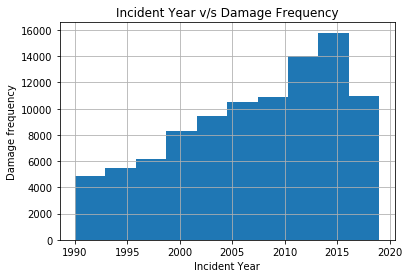

In [18]:
# Strikes per year
df["INCIDENT_YEAR"].hist()
plt.title('Incident Year v/s Damage Frequency')
plt.xlabel("Incident Year")
plt.ylabel("Damage frequency")

In [19]:
#Frequency of Species in the dataset
strikes_filtered['SPECIES'].value_counts()

Unknown bird - small         26152
Unknown bird - medium        14863
Gulls                         5451
Unknown bird                  4506
Mourning dove                 3115
Barn swallow                  2581
European starling             2485
Sparrows                      2413
Rock pigeon                   1719
Killdeer                      1643
American kestrel              1609
Unknown bird - large          1606
Horned lark                   1442
Red-tailed hawk               1342
Canada goose                  1224
Blackbirds                    1077
Hawks                         1042
White-tailed deer              959
Swallows                       847
Cliff swallow                  810
Ring-billed gull               703
Eastern meadowlark             668
Doves                          630
Ducks                          521
Herring gull                   514
Tree swallow                   483
Turkey vulture                 481
Western meadowlark             472
Barn owl            